In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import time
from tqdm.notebook import trange, tqdm

from matplotlib.ticker import AutoMinorLocator


## VS Code, choisir un seul des 3 :

# Pour affichage interactif (notamment 3D) dans notebook
# %matplotlib widget

# Pour affichage interactif (notamment 3D) hors du notebook
# %matplotlib qt

# Pour affichage simple dans notebook
%config InlineBackend.figure_format = 'png'

t = time.time()

In [2]:
df = pd.read_csv('data/df_train_prepro.csv').sample(frac=1)
df

,day,hashed_partner_id,hashed_campaign_id,contextid,display_env,target_env,rtbtypeid,rtbadvisibility,rtb_detectedlanguage,urlhash2,...,hashed_uid,hashed_xd_id,valueperclick,device_type,is_display_clicked,zonecostineuro,display_size,timestamp,hour,weekday
189793,2020-10-19,b'=\xa6\xeef\x99\xda\x1e\xb5-5\x8a\xa5\x9b\x8e...,b'G\x85\xe1u\x9a\x85\x158\xbdb\x91\xde2\x16\x0...,9,web,1,4.0,2.0,12.0,-2.023087e+09,...,b'\xf6\xd3l_\xed\xb9\xa1\x0c\x83]\x14q\xf7\x03...,b'\xee\x12\xfa\xff\xdef\xc4G\xf3\xc4}\xe8\xfe\...,0.586654,iPad,0,4.350000,180000,2020-10-19 10:12:50,10,Monday
727688,2020-10-13,"b'\xa1l\n\xb2`\xe3\x0b""\xcd\x06\xfa\xdf\x9aj0\...",b'l\xf5\x89f\x00\xcb\xb0rdO\xcd\xfaN\x8b\xad!Y...,6,web,1,74.0,0.0,127.0,7.631026e+08,...,"b'0\xed\xe9\x01\x80\xea\xb1xAkx\xb7""\xd3B\x80\...",b'\xa2(\xf2\x01\x08\xe4O\xd9G\x93U2L\xfaxYn\x8...,0.078864,Android,0,0.067802,0,2020-10-13 13:11:00,13,Tuesday
508210,2020-10-13,b'=\xa6\xeef\x99\xda\x1e\xb5-5\x8a\xa5\x9b\x8e...,b'Q\xba\x90%\xf8\xb0V\xdcM\xd4\r)1\x9d\x0f)w\x...,1,app_android,1,5.0,0.0,12.0,NaN,...,b'v\xbbGqA\xee\xec\xa9\x00T^~$\xf6\xa4\x1f\xa9...,b'\xb9\x821QU\xe2\x84Y`\x8f\x9b\x96\xaa\x84~\x...,0.049814,Android,0,0.025426,65520,2020-10-13 18:59:30,18,Tuesday
1086709,2020-10-14,b'\x0f\xbc\x909\x14[dI\xa7v]\xcc\x00\xd3\xbd\x...,b'\xf4k\x93K{l\xcfK3n\xc2\xa2U.R1\x9a\xd3\xe6H...,6,app_android,2,4.0,1.0,16.0,1.384186e+09,...,b'\x12k_\xc1\xf7\xda-\xdf\xed\xc1`\xed]z~\xb0\...,"b""\x16\xd8\xdd\x83)\xb5@\x00\xacbz\xa1\xc1iE\x...",0.144023,Android,0,0.089000,230400,2020-10-14 22:07:20,22,Wednesday
741315,2020-10-13,b'5IH\xefa\xd1\x01I\xfa\x91\xad\x1b\xf6\xa8go\...,b'|\xc9\x17R$I\xfb\xc76\x8c3}3^a\x99yaM\x1c\x9...,6,web,1,4.0,2.0,12.0,-1.752075e+09,...,b'\xb9\xce\x82\xa1\xa0\xcfn\xd5\xc81\xfe3\xf3#...,b'&\x13lk\n\xa1G\x9bj_\x00\x038o\x8f\xb5M\xa6\...,0.245422,Android,0,0.010000,0,2020-10-13 17:42:30,17,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447769,2020-10-16,b'=\xa6\xeef\x99\xda\x1e\xb5-5\x8a\xa5\x9b\x8e...,"b""f|g\xd5T\xc8\xe2\x90\xc6\xc8\xfeL\x0c\x15\xe...",7,web,1,4.0,2.0,12.0,-8.462803e+08,...,b'\xbd\x85\xfc?\xc6/\xc7\xa1\xb1\xe1\xce$\x95;...,b'\x88P\xd5\xab\xb0\x17\xe0n\xd62\x8ba\xf3<\x8...,0.512843,Desktop,0,2.000000,180000,2020-10-16 15:01:00,15,Friday
292501,2020-10-18,b'F\xb7$\xb2\xf8]O{\xd4\x85B:\x04\xbc\xf2\xcf\...,b'pM~\xcf%E\x96.\xc6i\\\xb3\x97o\xc7q4j\x9c\xd...,6,app_android,1,97.0,0.0,16.0,NaN,...,b'\x89v\xa6\xa3\x87f\xab\xf3\x12>\xf4\xc2\xe60...,b')\tG\x0e\xae\x98dL\x97Ut3\x9d\xee\x03(X\x0cq...,0.144372,Android,0,0.008548,16000,2020-10-18 20:32:20,20,Sunday
1044295,2020-10-13,b'h\xe1\xe45\xdbj\xb4?\xd3\x8a\xe5\xdflj\x03\x...,"b'\xa3\xb7\xad@6\x80\xc3\xb5\xd2\xbc}\x02\x7f""...",6,web,1,73.0,0.0,127.0,1.683661e+09,...,b'\xbf#\xf9lp\xcf:\xc6\xfaJ\xdbskj\xfc\x18\xb4...,b'\x96\xf8\xb1j\x9b.\x86u+\xc2\x80\x8d\xb5At\x...,0.242421,Desktop - Safari,0,0.601395,65520,2020-10-13 08:24:50,8,Tuesday
341134,2020-10-18,b'=\xa6\xeef\x99\xda\x1e\xb5-5\x8a\xa5\x9b\x8e...,b'\xef5\x9d\xc0y\x18\xa1\x8c\xa5l\xb5\r\x92-\x...,4,app_android,1,5.0,0.0,12.0,NaN,...,b'\xda\xb4oE\x0em\x9f\xa3\xefw[W?\xc5a\xd5\xb5...,b'4\xb9l\x7f\xe1+f\xf2\x19y\x13=\xc0\xcc\xf7\x...,0.088468,Android,0,0.017097,16000,2020-10-18 06:17:20,6,Sunday


In [3]:
df.dtypes

day                                                object
hashed_partner_id                                  object
hashed_campaign_id                                 object
contextid                                           int64
display_env                                        object
target_env                                          int64
rtbtypeid                                         float64
rtbadvisibility                                   float64
rtb_detectedlanguage                              float64
urlhash2                                          float64
urlhash3                                          float64
urlhash4                                          float64
user_country                                       object
hashed_affiliateid                                 object
hashed_app_id                                      object
googleviewability                                 float64
googlepagevertical                                float64
campaignscenar

# Corrélations

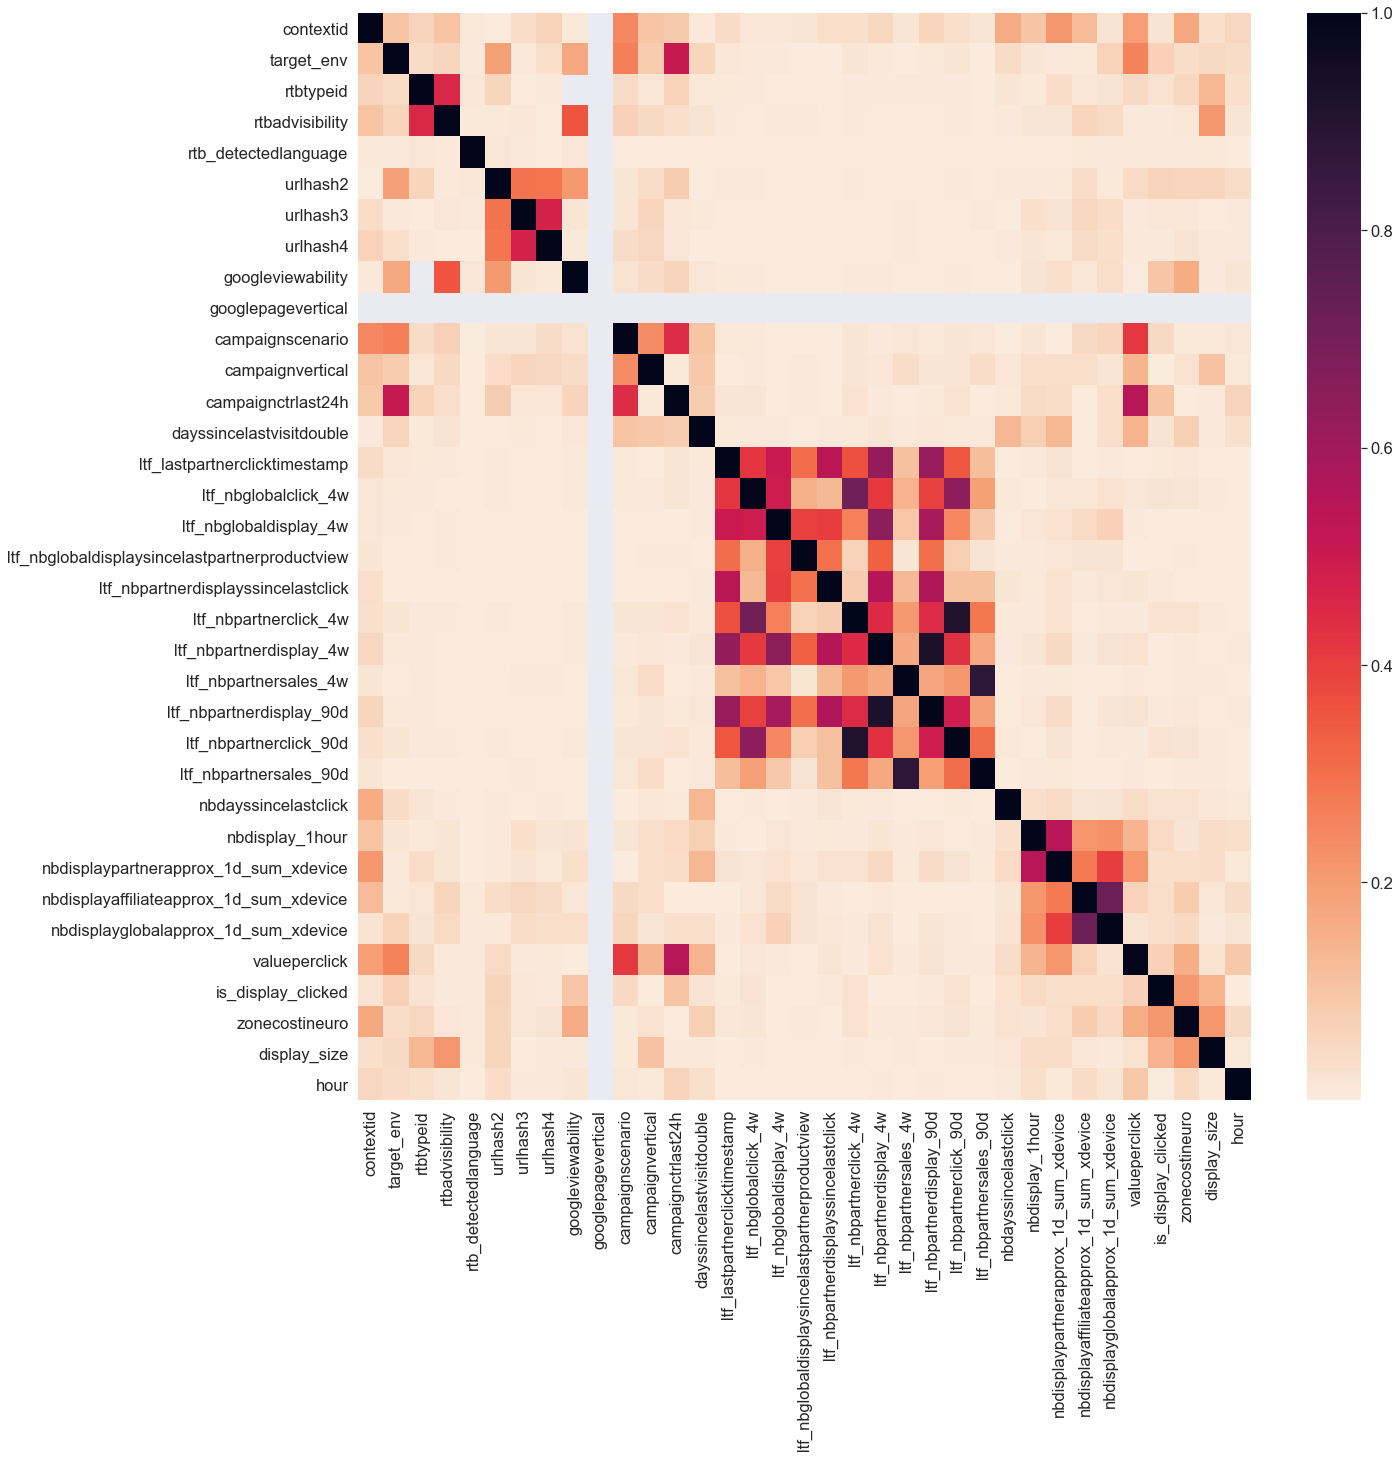

In [4]:
fig = plt.figure(figsize=(20,20))
sns.set(font_scale=1.5)
corrMatrix = df.corr()
corrMatrix = np.abs(corrMatrix)
sns.heatmap(corrMatrix, cmap="rocket_r", annot=False)
plt.show()

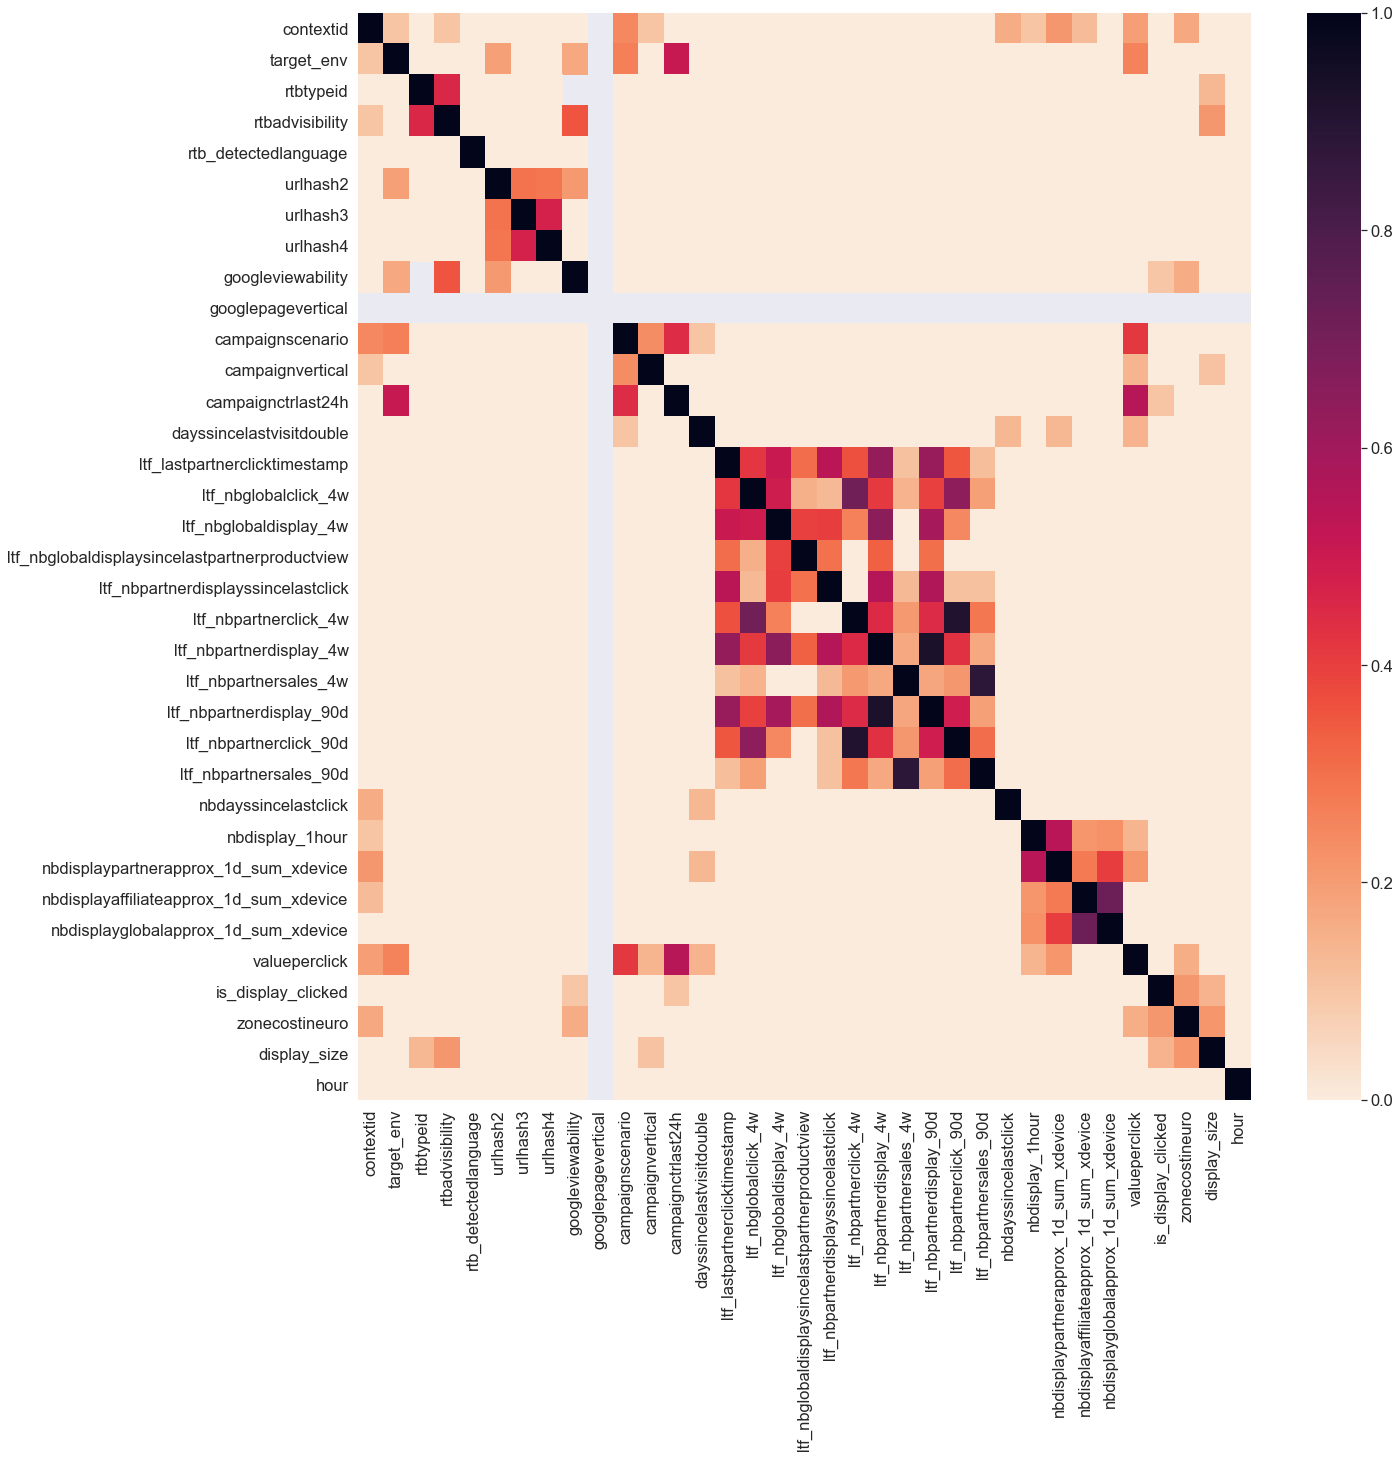

In [5]:
fig = plt.figure(figsize=(20,20))
sns.set(font_scale=1.5)
corrMatrix = corrMatrix.applymap(lambda x : 0 if x <= 0.1 else x)
sns.heatmap(corrMatrix, cmap="rocket_r", annot=False)
plt.show()

# Pourcentages de clics selon les modalités de plusieurs variables explicatives

In [6]:
def to_discrete(serie, n=10, moyenne=True):
    """
    Renvoie un objet Series contenant une version discrète de la variable
    numérique 'variable' dans le data frame df.
    Cette variable discrète est constituée de dix catégories croissantes.
    """
    discrete_var = np.zeros(len(serie))
    var_min = serie.min()
    var_max = serie.max()
    pas = (var_max - var_min)/n
    for i in trange(len(serie)):
        j = -1
        while serie.iloc[i] >= var_min + (j+1)*pas:
            j += 1
        if j == n:
            j = n-1
        discrete_var[i] = var_min + (j+0.5)*pas if moyenne else j
    return discrete_var

In [7]:
def ratio_plot(variable, zoom=False):
    """
    Trace la proportion de clics selon la variable 'variable' dans df.
    """
    clicked = df[df['is_display_clicked'] == 1].groupby(variable).count().reindex(set(df[variable]), fill_value=0).sort_index()['is_display_clicked']
    notclicked = df[df['is_display_clicked'] == 0].groupby(variable).count().reindex(set(df[variable]), fill_value=0).sort_index()['is_display_clicked']
    ratio = clicked / (clicked + notclicked)
    
    plt.style.use('default')
    fig, ax = plt.subplots(figsize=(8, 6))
    ratio.plot(ax=ax, marker='o')
    plt.xticks(rotation=0)
    
    if not zoom:
        y_min, y_max = ax.get_ylim()
        y_min = 0
        ax.set_ylim(y_min, y_max)
    
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.grid(which='major')
    ax.grid(b=True, which='minor', axis='y', linestyle='--', alpha=0.2)
    
    ax.set_title(f"Proportion de clics en fonction de {variable}")
    ax.set_xlabel(f"{variable}")
    ax.set_ylabel('Nb de clics/ (nb de clics + nb de non clics)') 

    plt.show()
    plt.style.use('default')

In [8]:
def ratios_plot(variables):
    """
    Trace sur un même graphique les proportion de clics selon les variables de
    la liste 'variables' dans df.
    """
    ratios = []
    mini = float('inf')
    maxi = - float('inf')
    for variable in variables:
        clicked = df[df['is_display_clicked'] == 1].groupby(variable).count().reindex(set(df[variable]), fill_value=0).sort_index()['is_display_clicked']
        notclicked = df[df['is_display_clicked'] == 0].groupby(variable).count().reindex(set(df[variable]), fill_value=0).sort_index()['is_display_clicked']
        ratio = clicked / (clicked + notclicked)
        m, M = ratio.min(), ratio.max()
        if m < mini:
            mini = m
        if M > maxi:
            maxi = M
        ratios.append(ratio)
    
    plt.style.use('default')
    fig, ax = plt.subplots(figsize=(8, 6))
    plt.xticks(rotation=0)
    
    ax.set_ylim(mini - 0.05*(maxi-mini), maxi + 0.05*(maxi-mini))
    
    for i, ratio in enumerate(ratios):
        ratio.plot(ax=ax, label=variables[i], marker='x', legend=True)
    
    ax.grid(which='major')
    ax.grid(b=True, which='minor', axis='y', linestyle='--', alpha=0.2)
    
    ax.set_title("Proportion de clics en fonction des variables")
    ax.set_xlabel("Modalités croissantes des variables")
    ax.set_ylabel('Nb de clics/ (nb de clics + nb de non clics)') 

    plt.show()

In [9]:
def stacked_barplot(variable):
    clicked = df[df['is_display_clicked'] == 1].groupby(variable).count().reindex(set(df[variable]), fill_value=0).sort_index()['is_display_clicked']
    notclicked = df[df['is_display_clicked'] == 0].groupby(variable).count().reindex(set(df[variable]), fill_value=0).sort_index()['is_display_clicked']
    total = df.groupby(variable).count()['is_display_clicked']
    clicked = clicked / total * 100
    notclicked = notclicked / total * 100

    r = list(range(len(clicked)))

    # plot
    plt.style.use('default')
    fig, ax = plt.subplots(figsize=(8, 6))
    barWidth = 0.85
    names = clicked.index
    # Create orange Bars
    ax.bar(r, list(notclicked), color='#f9bc86', edgecolor='white', width=barWidth, label="no click")
    # # Create blue Bars
    ax.bar(r, list(clicked), bottom=list(notclicked), color='#a3acff',
        edgecolor='white', width=barWidth, label='click')
    
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.grid(which='major', axis='y')
    ax.grid(b=True, which='minor', axis='y', linestyle='--', alpha=0.2)

    plt.legend()
    # Custom x axis
    plt.xticks(r, names)
    plt.xlabel(variable)
    plt.ylabel('Répartition des clics')

    # Show graphic
    plt.show()
    plt.style.use('default')

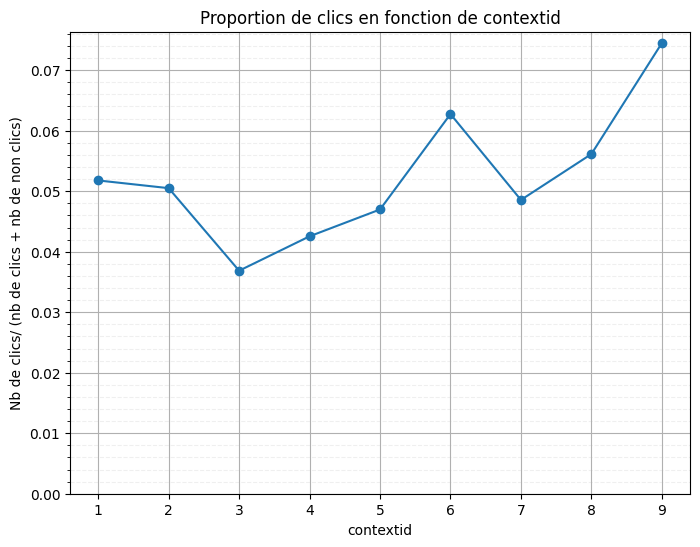

In [10]:
ratio_plot("contextid")

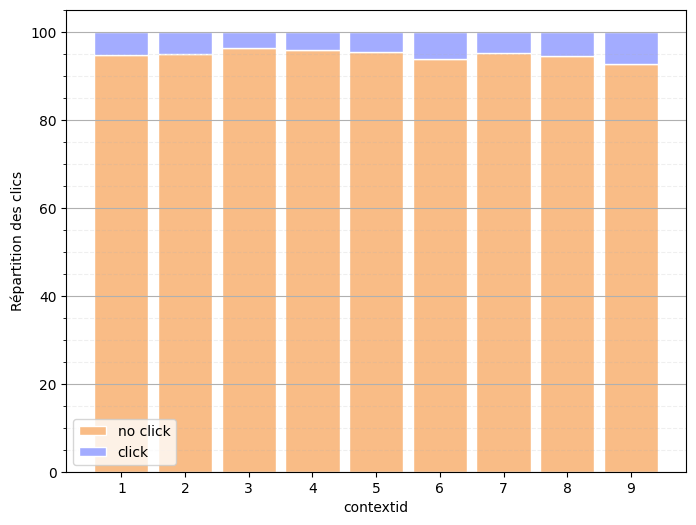

In [11]:
stacked_barplot('contextid')

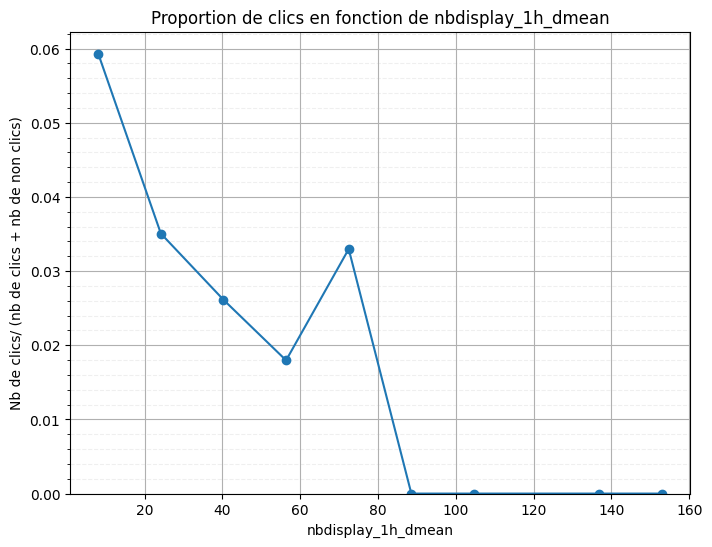

CPU times: user 26.4 s, sys: 1.32 s, total: 27.7 s
Wall time: 27.8 s


In [12]:
%%time
df["nbdisplay_1h_dmean"] = to_discrete(df["nbdisplay_1hour"], moyenne=True)
ratio_plot("nbdisplay_1h_dmean")

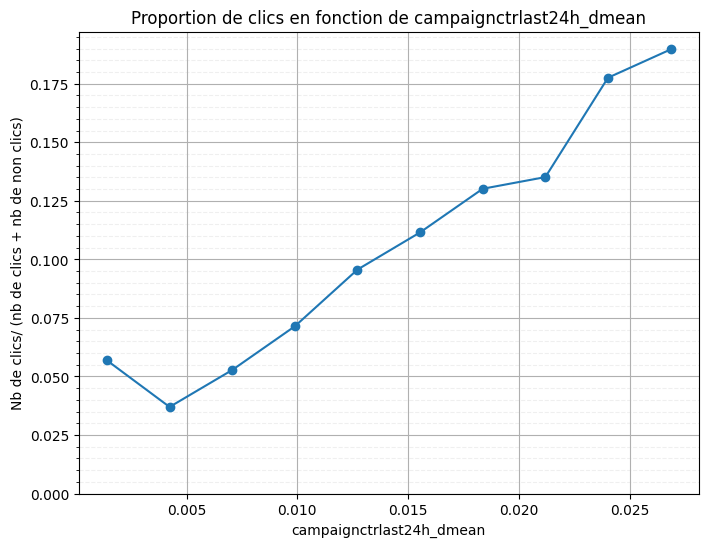

CPU times: user 46.2 s, sys: 1.63 s, total: 47.8 s
Wall time: 47.9 s


In [13]:
%%time
df["campaignctrlast24h_dmean"] = to_discrete(df["campaignctrlast24h"], moyenne=True)
ratio_plot("campaignctrlast24h_dmean")

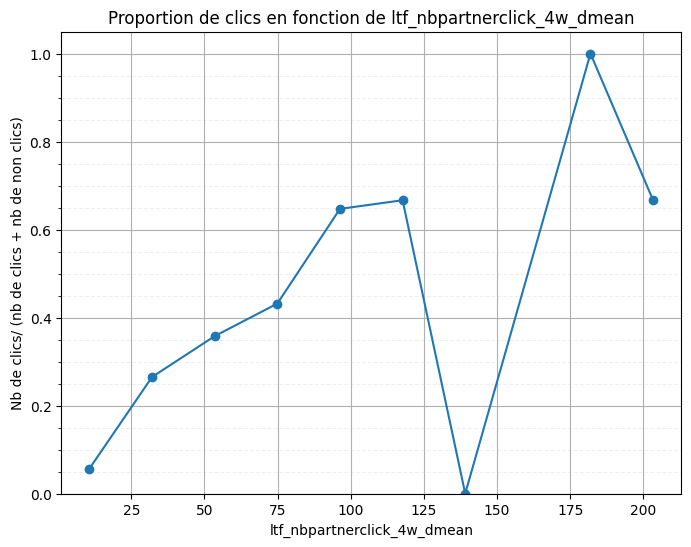

In [14]:
df["ltf_nbpartnerclick_4w_dmean"] = to_discrete(df["ltf_nbpartnerclick_4w"], moyenne=True)
ratio_plot("ltf_nbpartnerclick_4w_dmean")

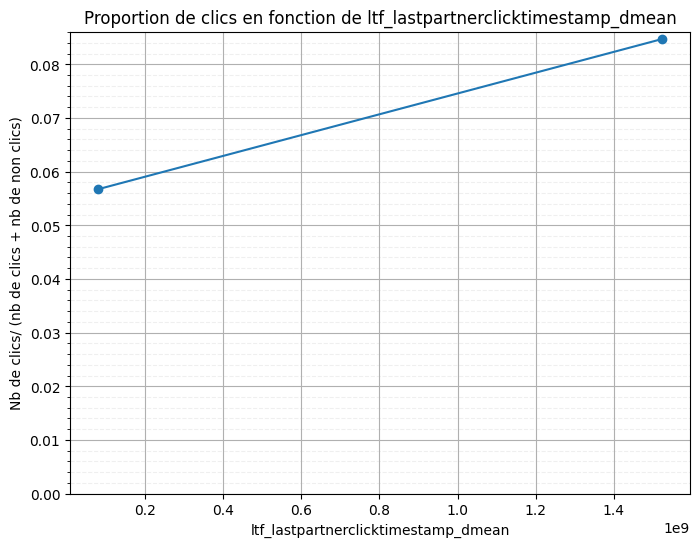

In [15]:
df["ltf_lastpartnerclicktimestamp_dmean"] = to_discrete(df["ltf_lastpartnerclicktimestamp"], moyenne=True)
ratio_plot("ltf_lastpartnerclicktimestamp_dmean")

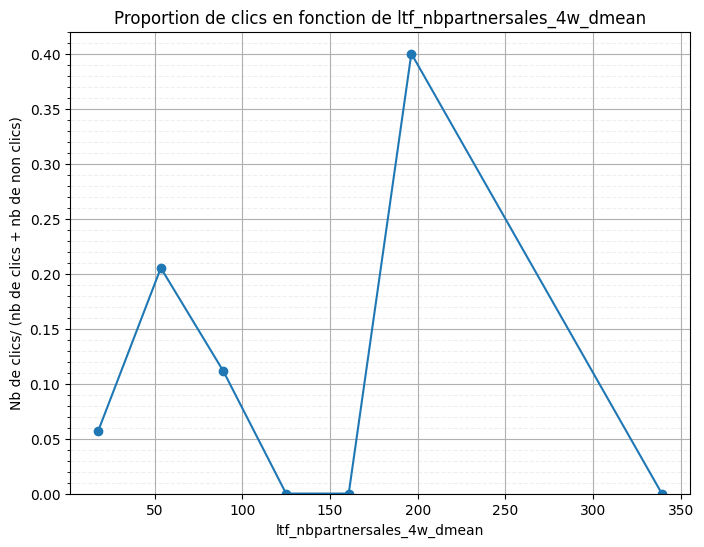

In [16]:
df["ltf_nbpartnersales_4w_dmean"] = to_discrete(df["ltf_nbpartnersales_4w"], moyenne=True)
ratio_plot("ltf_nbpartnersales_4w_dmean")

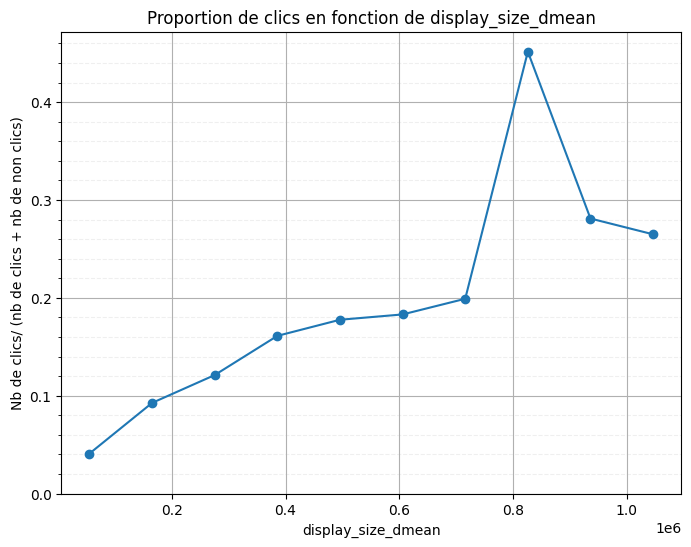

In [17]:
df["display_size_dmean"] = to_discrete(df["display_size"], moyenne=True)
ratio_plot("display_size_dmean")

In [18]:
%%time
df["campaignctrlast24h_d"] = to_discrete(df["campaignctrlast24h"], moyenne=False)
df['dayssincelastvisitdouble_d'] = to_discrete(df["dayssincelastvisitdouble"], moyenne=False)
df["ltf_lastpartnerclicktimestamp_d"] = to_discrete(df["ltf_lastpartnerclicktimestamp"], moyenne=False)
df["ltf_nbpartnersales_4w_d"] = to_discrete(df["ltf_nbpartnersales_4w"], moyenne=False)
df["nbdayssincelastclick_d"] = to_discrete(df["nbdayssincelastclick"], moyenne=False)
df["nbdisplay_1hour_d"] = to_discrete(df["nbdisplay_1hour"], moyenne=False)
df["valueperclick_d"] = to_discrete(df["valueperclick"], moyenne=False)
df["zonecostineuro_d"] = to_discrete(df["zonecostineuro"], moyenne=False)
df["display_size_d"] = to_discrete(df["display_size"], moyenne=False)


CPU times: user 4min 44s, sys: 6.17 s, total: 4min 50s
Wall time: 6min 40s


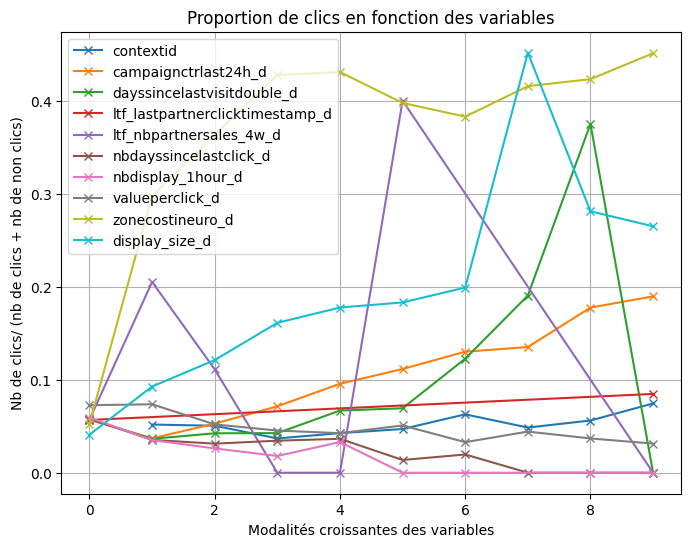

In [19]:
ratios_plot(['contextid', 
             'campaignctrlast24h_d', 
             'dayssincelastvisitdouble_d', 
             'ltf_lastpartnerclicktimestamp_d', 
             'ltf_nbpartnersales_4w_d', 
             'nbdayssincelastclick_d', 
             'nbdisplay_1hour_d', 
             'valueperclick_d', 
             'zonecostineuro_d', 
             'display_size_d'])

In [20]:
d = df[['is_display_clicked', 'hashed_uid', 'contextid']].groupby(['hashed_uid']).sum()
d.sort_values('is_display_clicked', ascending=False, inplace=True)
d['user_apperances'] = df['hashed_uid'].value_counts()
d['contextid_weighted'] = d['contextid'] / d['user_apperances']

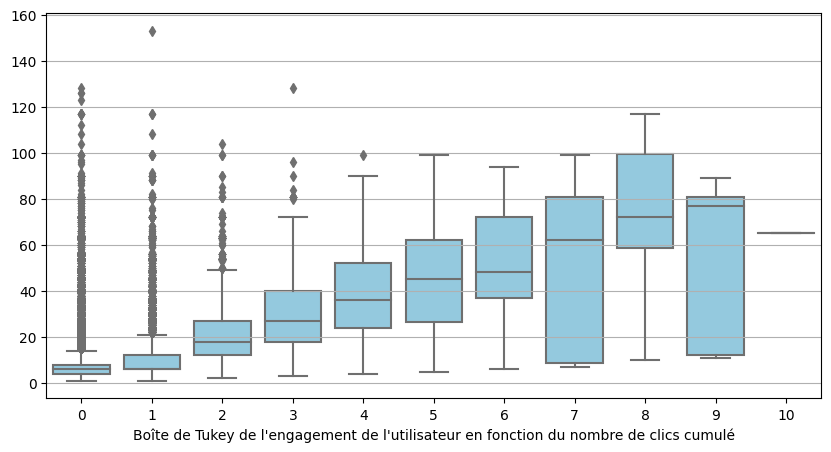

In [21]:
fig, ax = plt.subplots(figsize=(10,5))
plt.style.use('default')
sns.boxplot(x="is_display_clicked", y="contextid", data=d, ax=ax, color="skyblue")
ax.set_xlabel("Boîte de Tukey de l'engagement de l'utilisateur en fonction du nombre de clics cumulé")
ax.set_ylabel('')
ax.grid(axis='y')
plt.show()
plt.style.use('default')

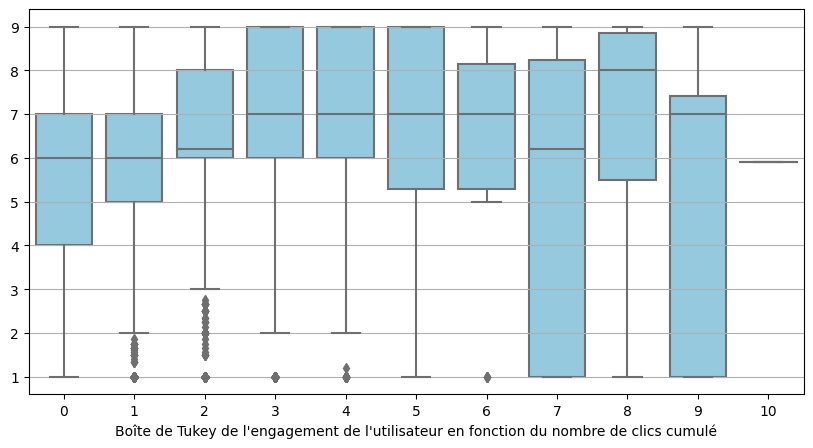

In [22]:
fig, ax = plt.subplots(figsize=(10,5))
plt.style.use('default')
sns.boxplot(x="is_display_clicked", y="contextid_weighted", data=d, ax=ax, color="skyblue")
ax.set_xlabel("Boîte de Tukey de l'engagement de l'utilisateur en fonction du nombre de clics cumulé")
ax.set_ylabel('')
ax.grid(axis='y')
plt.show()
plt.style.use('default')

## Répartition du nombre de clics

Text(0.5, 1.0, 'hashed_uid')

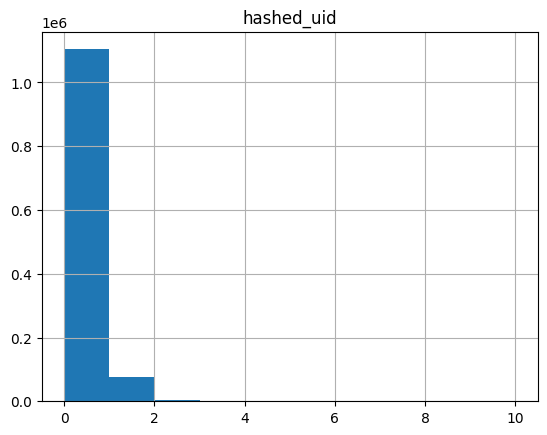

In [23]:
a = df[['is_display_clicked', 'hashed_uid']].groupby(['hashed_uid']).sum()
a[(a.is_display_clicked < 20)].hist()
plt.title("hashed_uid")

Text(0.5, 1.0, 'hashed_uid')

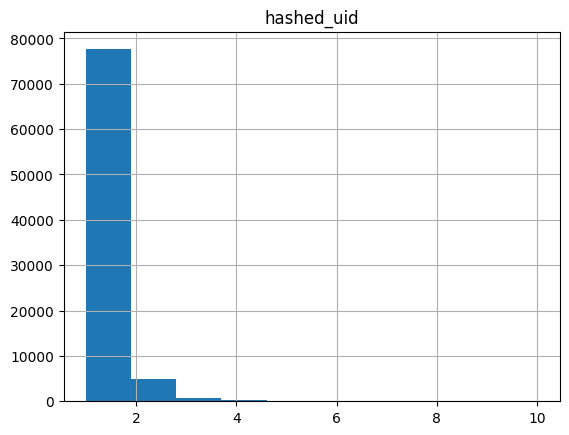

In [24]:
a[(a.is_display_clicked > 0) & (a.is_display_clicked < 20)].hist()
plt.title("hashed_uid")

Text(0.5, 1.0, 'hashed_xd_id')

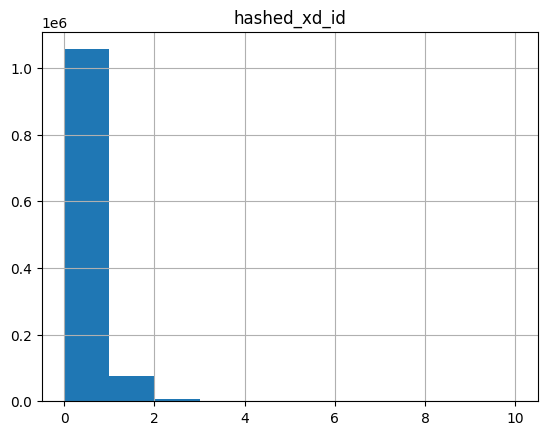

In [25]:
# `hashed_xd_id` : Hashed cross device identification number 
b = df[['is_display_clicked', 'hashed_xd_id']].groupby(['hashed_xd_id']).sum()
b[(b.is_display_clicked < 20)].hist()
plt.title("hashed_xd_id")

Text(0.5, 1.0, 'hashed_xd_id')

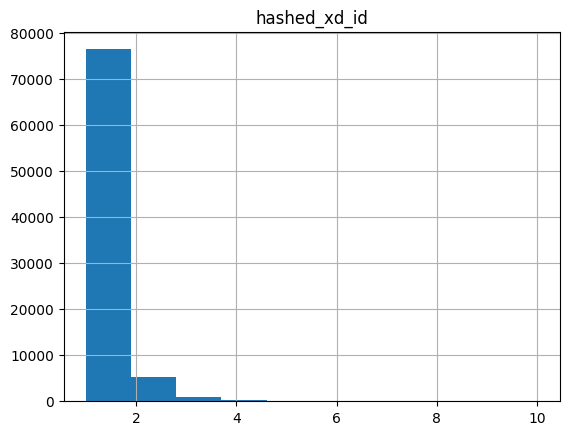

In [26]:
b[(b.is_display_clicked > 0) & (b.is_display_clicked < 20)].hist()
plt.title("hashed_xd_id")

## Timestamp

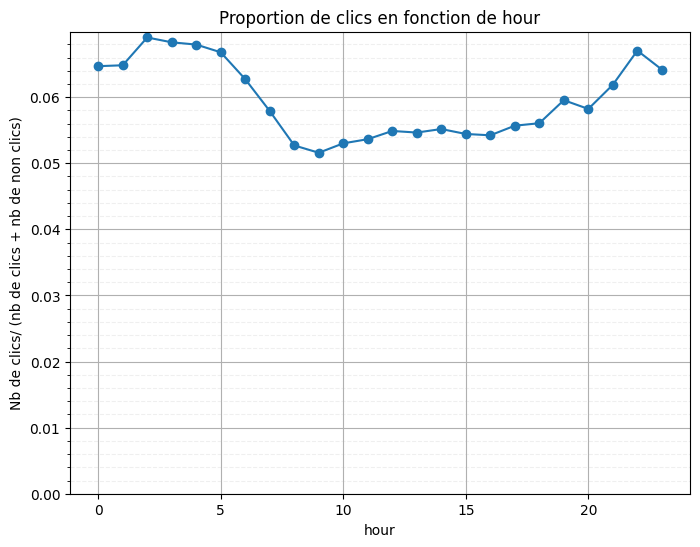

In [27]:
ratio_plot("hour")

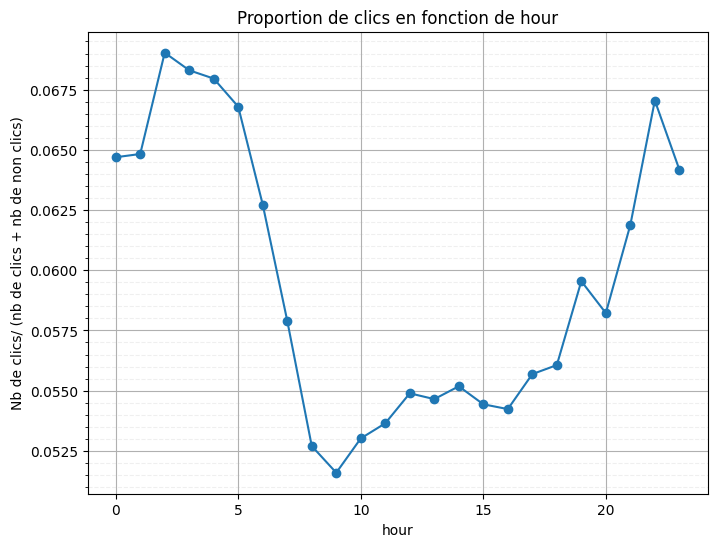

In [28]:
ratio_plot("hour", zoom=True)

In [29]:
df.head()

,day,hashed_partner_id,hashed_campaign_id,contextid,display_env,target_env,rtbtypeid,rtbadvisibility,rtb_detectedlanguage,urlhash2,...,display_size_dmean,campaignctrlast24h_d,dayssincelastvisitdouble_d,ltf_lastpartnerclicktimestamp_d,ltf_nbpartnersales_4w_d,nbdayssincelastclick_d,nbdisplay_1hour_d,valueperclick_d,zonecostineuro_d,display_size_d
189793,2020-10-19,b'=\xa6\xeef\x99\xda\x1e\xb5-5\x8a\xa5\x9b\x8e...,b'G\x85\xe1u\x9a\x85\x158\xbdb\x91\xde2\x16\x0...,9,web,1,4.0,2.0,12.0,-2.023087e+09,...,165240.0,1.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,1.0
727688,2020-10-13,"b'\xa1l\n\xb2`\xe3\x0b""\xcd\x06\xfa\xdf\x9aj0\...",b'l\xf5\x89f\x00\xcb\xb0rdO\xcd\xfaN\x8b\xad!Y...,6,web,1,74.0,0.0,127.0,7.631026e+08,...,55080.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
508210,2020-10-13,b'=\xa6\xeef\x99\xda\x1e\xb5-5\x8a\xa5\x9b\x8e...,b'Q\xba\x90%\xf8\xb0V\xdcM\xd4\r)1\x9d\x0f)w\x...,1,app_android,1,5.0,0.0,12.0,NaN,...,55080.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1086709,2020-10-14,b'\x0f\xbc\x909\x14[dI\xa7v]\xcc\x00\xd3\xbd\x...,b'\xf4k\x93K{l\xcfK3n\xc2\xa2U.R1\x9a\xd3\xe6H...,6,app_android,2,4.0,1.0,16.0,1.384186e+09,...,275400.0,5.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0
741315,2020-10-13,b'5IH\xefa\xd1\x01I\xfa\x91\xad\x1b\xf6\xa8go\...,b'|\xc9\x17R$I\xfb\xc76\x8c3}3^a\x99yaM\x1c\x9...,6,web,1,4.0,2.0,12.0,-1.752075e+09,...,55080.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0


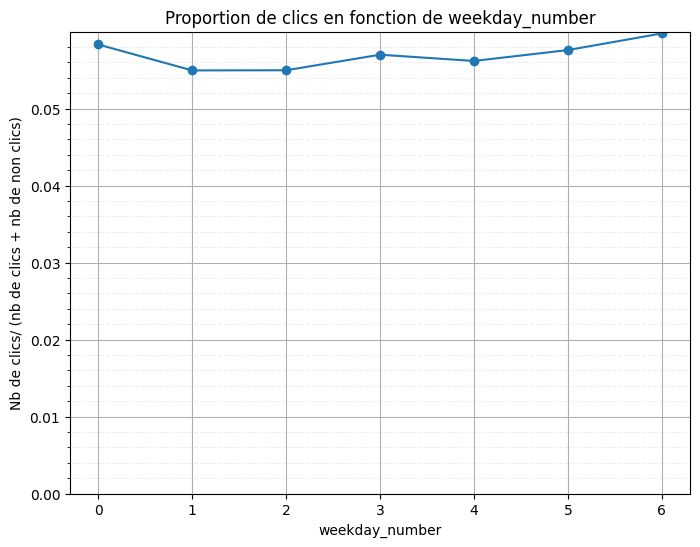

In [30]:
df['weekday_number'] = pd.to_datetime(df.timestamp).dt.weekday
ratio_plot("weekday_number")

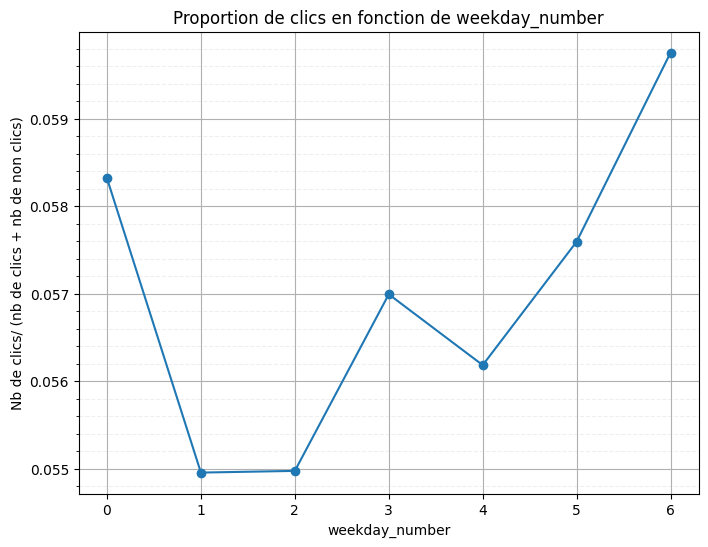

In [31]:
ratio_plot("weekday_number", zoom=True)

In [32]:
print(f"Temps d'exécution total : {time.strftime('%H:%M:%S', time.gmtime(time.time()-t))}")

Temps d'exécution total : 00:11:54
